In [137]:
# import pandas data set
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy.optimize import curve_fit
from matplotlib.ticker import ScalarFormatter
import geopandas as gpd
import matplotlib.patches as mpatches
import warnings
warnings.filterwarnings("ignore")

# EDA

In [350]:
# Loading the dataset:
df1 = pd.read_csv('https://ws.cso.ie/public/api.restful/PxStat.Data.Cube_API.ReadDataset/PEA11/CSV/1.0/en')

In [351]:
# Displaying first 5 rows:
df1.head()

,STATISTIC,STATISTIC Label,TLIST(A1),Year,C02076V03371,Single Year of Age,C02199V02655,Sex,UNIT,VALUE
0,PEA11,Population estimates from 1926,1926,1926,-,All ages,-,Both sexes,Number,2971992
1,PEA11,Population estimates from 1926,1926,1926,-,All ages,1,Male,Number,1506889
2,PEA11,Population estimates from 1926,1926,1926,-,All ages,2,Female,Number,1465103
3,PEA11,Population estimates from 1926,1926,1926,200,Under 1 year,-,Both sexes,Number,55391
4,PEA11,Population estimates from 1926,1926,1926,200,Under 1 year,1,Male,Number,28084


In [352]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11817 entries, 0 to 11816
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   STATISTIC           11817 non-null  object
 1   STATISTIC Label     11817 non-null  object
 2   TLIST(A1)           11817 non-null  int64 
 3   Year                11817 non-null  int64 
 4   C02076V03371        11817 non-null  object
 5   Single Year of Age  11817 non-null  object
 6   C02199V02655        11817 non-null  object
 7   Sex                 11817 non-null  object
 8   UNIT                11817 non-null  object
 9   VALUE               11817 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 923.3+ KB


In [353]:
null_values = df1.isnull().sum()
null_values

STATISTIC             0
STATISTIC Label       0
TLIST(A1)             0
Year                  0
C02076V03371          0
Single Year of Age    0
C02199V02655          0
Sex                   0
UNIT                  0
VALUE                 0
dtype: int64

In [354]:
# Dropping the 'STATISTIC Label' column it's irrelevant for the analysis
df1_col_drop = ['STATISTIC','STATISTIC Label','TLIST(A1)','C02076V03371','C02199V02655','UNIT']
df1.drop(df1_col_drop ,axis=1, inplace=True) 

In [355]:
# Renaming the columns
df1 = df1.rename(columns={'Single Year of Age': 'Age_Group','VALUE':'Population'})

In [356]:
df1

,Year,Age_Group,Sex,Population
0,1926,All ages,Both sexes,2971992
1,1926,All ages,Male,1506889
2,1926,All ages,Female,1465103
3,1926,Under 1 year,Both sexes,55391
4,1926,Under 1 year,Male,28084
...,...,...,...,...
11812,2023,98 years,Male,197
11813,2023,98 years,Female,632
11814,2023,99 years and over,Both sexes,1600
11815,2023,99 years and over,Male,352


Let's compare if numbers look great when breaking down All ages and Both sexes in one df. The rest will go into another df to compare if there are differences.

In [357]:
#All Ages and both sexes:
df1a = df1[(df1['Age_Group'] == 'All ages') & (df1['Sex'] == 'Both sexes')]
df1b = df1a.groupby('Year')['Population'].sum().reset_index() # Creating a df

In [358]:
# !All Ages and both sexes:
df1c =df1[(df1['Age_Group'] != 'All ages') & (df1['Sex'] != 'Both sexes')]
df1d = df1b.groupby('Year')['Population'].sum().reset_index() # Creating a df

In [359]:
df1d  = df1d .rename(columns={'Population': 'Population_2'}) # Renaming column Population to merge

In [360]:
df1b= pd.merge(df1b,df1d, on='Year') # Merging both df's

In [361]:
df1b['Pop_Diff'] = df1b['Population']-df1b['Population_2'] # Substracting Population to see if there are any differences

# When breaking down into categories there are no differences for the population.

In [362]:
df1b

,Year,Population,Population_2,Pop_Diff
0,1926,2971992,2971992,0
1,1936,2968420,2968420,0
2,1946,2955107,2955107,0
3,1951,2960593,2960593,0
4,1961,2818341,2818341,0
5,1966,2884002,2884002,0
6,1971,2978248,2978248,0
7,1979,3368217,3368217,0
8,1981,3443405,3443405,0
9,1986,3540643,3540643,0


# Population Growth

For this dataset numbers match across categories, I'll be organising the data for sex categories  
as in Both Sexes, Male and Female.

In [363]:
df1

,Year,Age_Group,Sex,Population
0,1926,All ages,Both sexes,2971992
1,1926,All ages,Male,1506889
2,1926,All ages,Female,1465103
3,1926,Under 1 year,Both sexes,55391
4,1926,Under 1 year,Male,28084
...,...,...,...,...
11812,2023,98 years,Male,197
11813,2023,98 years,Female,632
11814,2023,99 years and over,Both sexes,1600
11815,2023,99 years and over,Male,352


In [364]:
# Dropping rows based on criteria
df1 = df1[~((df1['Sex'] == 'Both sexes') & (df1['Age_Group'] != 'All ages'))] # Drop both sexes different that All ages
df1 = df1[~((df1['Sex'] != 'Both sexes') & (df1['Age_Group'] == 'All ages'))] # Drop Male and Female All ages


Using a Pivot to group all values.

In [365]:
pivot_df1 = df1.pivot_table(index=['Year'],columns='Sex', values='Population', aggfunc='sum').reset_index()


In [366]:
pivot_df1.head()

Sex,Year,Both sexes,Female,Male
0,1926,2971992,1465103,1506889
1,1936,2968420,1447966,1520454
2,1946,2955107,1460230,1494877
3,1951,2960593,1453996,1506597
4,1961,2818341,1401792,1416549


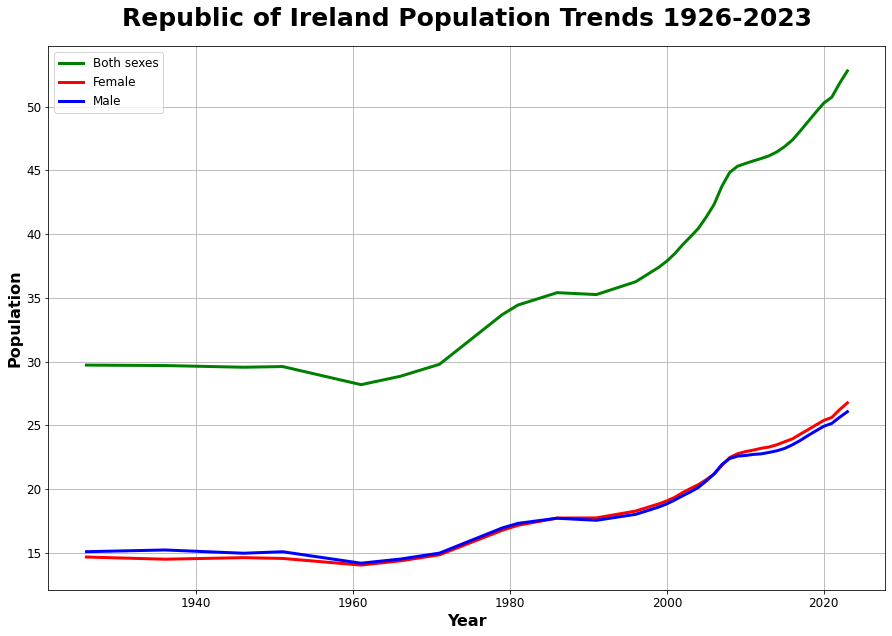

In [508]:
# Plotting
plt.figure(figsize=(15, 10))
plt.plot(pivot_df1['Year'], pivot_df1['Both sexes'],color='green', label='Both sexes',linewidth=3)
plt.plot(pivot_df1['Year'], pivot_df1['Female'],color='red', label='Female',linewidth=3)
plt.plot(pivot_df1['Year'], pivot_df1['Male'],color='blue',label='Male',linewidth=3)

# Lables
plt.title('Republic of Ireland Population Trends 1926-2023', loc="center", pad=20, fontsize=25, fontweight="bold")
plt.xlabel('Year', fontsize=16, fontweight="bold")
plt.ylabel('Population', fontsize=16, fontweight="bold")
plt.ticklabel_format(style='plain', axis='y') # Avoiding scientific notation
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.legend( fontsize=12)
plt.grid(True)
plt.show()

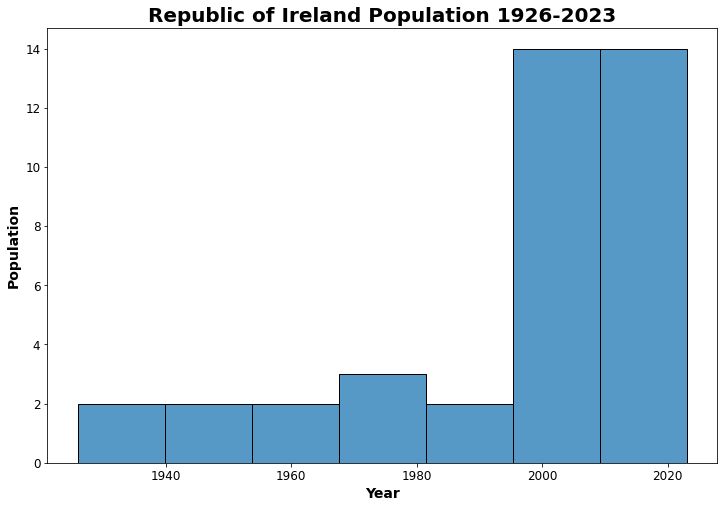

In [517]:
fig, ax = plt.subplots(figsize=(12, 8))
ax = sns.histplot(pivot_df1.Year)

# Set the properties of the axes
ax.set_xlabel('Year', fontsize=14, fontweight='bold')
ax.set_ylabel('Population', fontsize=14, fontweight='bold')
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_title('Republic of Ireland Population 1926-2023', fontsize=20, fontweight='bold');

# Population Pyramids

In [369]:
df1_backup = df1.copy()

In [370]:
df1=df1_backup.copy()

In [371]:
#Normalising Population
df1['Population'] = df1['Population'] / 100000

In [372]:
df1.head()

,Year,Age_Group,Sex,Population
0,1926,All ages,Both sexes,29.71992
4,1926,Under 1 year,Male,0.28084
5,1926,Under 1 year,Female,0.27307
7,1926,1 year,Male,0.28374
8,1926,1 year,Female,0.27502


In [373]:
def group_age_by_5_years(df1):
    df1['Age_Group'] = df1['Age_Group'].str.extract('(\d+)').astype(float)
    df1['Age_Group'] = pd.cut(df1['Age_Group'], bins=range(0, 105, 5), labels=[f'{i}-{i + 4}' for i in range(0, 100, 5)], right=False)
    return df1

# Applying the function
df1 = group_age_by_5_years(df1)

To achieve this we need to first create a pivot table to sumarize all values

In [374]:
piramid_df = df1.pivot_table(index=['Year','Age_Group'],columns='Sex', values='Population', aggfunc='sum').reset_index()

In [375]:
piramid_df

Sex,Year,Age_Group,Both sexes,Female,Male
0,1926,0-4,0.0,1.41540,1.46173
1,1926,5-9,0.0,1.39869,1.44764
2,1926,10-14,0.0,1.44719,1.50814
3,1926,15-19,0.0,1.40140,1.46047
4,1926,20-24,0.0,1.15713,1.24518
...,...,...,...,...,...
775,2023,75-79,0.0,0.84271,0.77819
776,2023,80-84,0.0,0.55611,0.46149
777,2023,85-89,0.0,0.32790,0.22958
778,2023,90-94,0.0,0.15799,0.08271


In [376]:
piramid_df_backup = piramid_df.copy()

In [377]:
piramid_df["Female_Left"] = 0

In [378]:
piramid_df["Female_Width"] = piramid_df["Female"]

In [379]:
piramid_df["Male_Left"] = -piramid_df["Male"]

In [380]:
piramid_df["Male_Width"] = piramid_df["Male"]

In [381]:
piramid_df





Sex,Year,Age_Group,Both sexes,Female,Male,Female_Left,Female_Width,Male_Left,Male_Width
0,1926,0-4,0.0,1.41540,1.46173,0,1.41540,-1.46173,1.46173
1,1926,5-9,0.0,1.39869,1.44764,0,1.39869,-1.44764,1.44764
2,1926,10-14,0.0,1.44719,1.50814,0,1.44719,-1.50814,1.50814
3,1926,15-19,0.0,1.40140,1.46047,0,1.40140,-1.46047,1.46047
4,1926,20-24,0.0,1.15713,1.24518,0,1.15713,-1.24518,1.24518
...,...,...,...,...,...,...,...,...,...
775,2023,75-79,0.0,0.84271,0.77819,0,0.84271,-0.77819,0.77819
776,2023,80-84,0.0,0.55611,0.46149,0,0.55611,-0.46149,0.46149
777,2023,85-89,0.0,0.32790,0.22958,0,0.32790,-0.22958,0.22958
778,2023,90-94,0.0,0.15799,0.08271,0,0.15799,-0.08271,0.08271


Filtering by years 1926, 1961, 1996, 2023

In [382]:
piramid_df_1926 = piramid_df[piramid_df['Year'] == 1926]
piramid_df_1961 = piramid_df[piramid_df['Year'] == 1961]
piramid_df_1996 = piramid_df[piramid_df['Year'] == 1996]
piramid_df_2023 = piramid_df[piramid_df['Year'] == 2023]

In [383]:
piramid_df_1926

Sex,Year,Age_Group,Both sexes,Female,Male,Female_Left,Female_Width,Male_Left,Male_Width
0,1926,0-4,0.0,1.41540,1.46173,0,1.41540,-1.46173,1.46173
1,1926,5-9,0.0,1.39869,1.44764,0,1.39869,-1.44764,1.44764
2,1926,10-14,0.0,1.44719,1.50814,0,1.44719,-1.50814,1.50814
3,1926,15-19,0.0,1.40140,1.46047,0,1.40140,-1.46047,1.46047
4,1926,20-24,0.0,1.15713,1.24518,0,1.15713,-1.24518,1.24518
5,1926,25-29,0.0,1.08755,1.06646,0,1.08755,-1.06646,1.06646
6,1926,30-34,0.0,0.90798,0.92502,0,0.90798,-0.92502,0.92502
7,1926,35-39,0.0,0.88410,0.87349,0,0.88410,-0.87349,0.87349
8,1926,40-44,0.0,0.83035,0.86050,0,0.83035,-0.86050,0.86050
9,1926,45-49,0.0,0.81883,0.87010,0,0.81883,-0.87010,0.87010


Serious problem when plotting the second Population Pyramid, I need it to reset the index
for this piece of code to start working "for idx in range(len(piramid_df_2023)):
    plt.text(x=piramid_df_2023["Male_Left"][idx]-0.1, y=idx, s="{:.3f} %"."

In [384]:
piramid_df_1996 = piramid_df_1996.reset_index(drop=True)
piramid_df_2023 = piramid_df_2023.reset_index(drop=True)

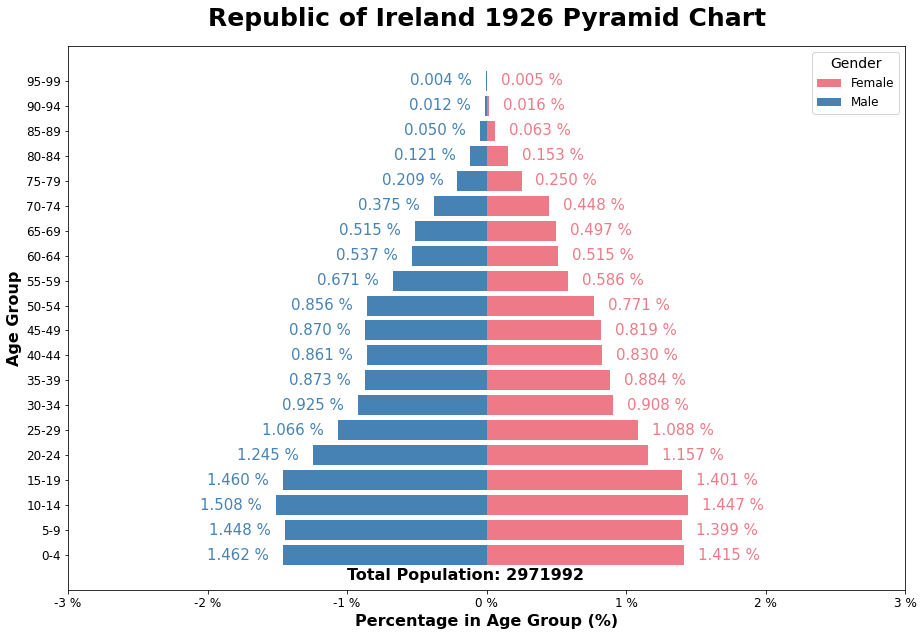

In [504]:
#code source from https://coderzcolumn.com/tutorials/data-science/population-pyramid-chart-using-matplotlib
female_color = "#ee7a87"
male_color = "#4682b4"

fig = plt.figure(figsize=(15,10))

plt.barh(y=piramid_df_1926["Age_Group"], width=piramid_df_1926["Female_Width"], color="#ee7a87", label="Female");
plt.barh(y=piramid_df_1926["Age_Group"], width=piramid_df_1926["Male_Width"], left=piramid_df_1926["Male_Left"],
         color="#4682b4", label="Male");



for idx in range(len(piramid_df_1926)):
    plt.text(x=piramid_df_1926["Male_Left"][idx]-0.1, y=idx, s="{:.3f} %".format(piramid_df_1926["Male"][idx]),
             ha="right", va="center",
             fontsize=15, color="#4682b4");
    plt.text(x=piramid_df_1926["Female_Width"][idx]+0.1, y=idx, s="{:.3f} %".format(piramid_df_1926["Female"][idx]),
             ha="left", va="center",
             fontsize=15, color="#ee7a87");

piramid_df_1926['total_population'] = (piramid_df_1926['Female'] + piramid_df_1926['Male'])*100000
total_population =int(piramid_df_1926['total_population'].sum()) #Adding and converting to int to eliminate .0
plt.xlim(-3,3);

plt.xticks(range(-3,4), ["{} %".format(i) for i in range(-3,4)], fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc="best",fontsize=12,title='Gender',title_fontsize=14); 
plt.xlabel("Percentage in Age Group (%)", fontsize=16, fontweight="bold")
plt.ylabel("Age Group", fontsize=16, fontweight="bold")
plt.title("Republic of Ireland 1926 Pyramid Chart", loc="center", pad=20, fontsize=25, fontweight="bold")

plt.text(-1, -1, f'Total Population: {total_population}', fontsize=16,fontweight="bold");

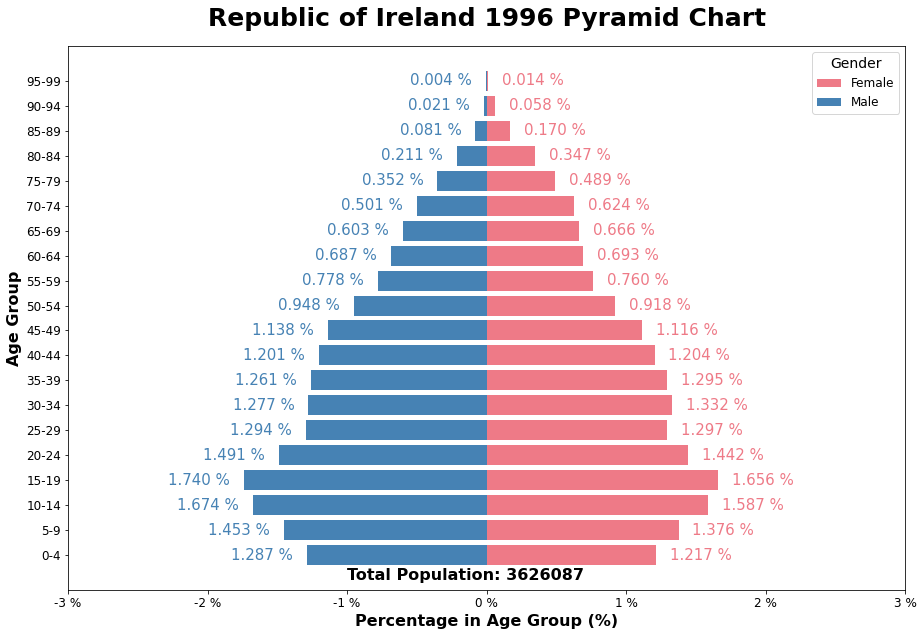

In [503]:
#code source from https://coderzcolumn.com/tutorials/data-science/population-pyramid-chart-using-matplotlib
female_color = "#ee7a87"
male_color = "#4682b4"

fig = plt.figure(figsize=(15,10))

plt.barh(y=piramid_df_1996["Age_Group"], width=piramid_df_1996["Female_Width"], color="#ee7a87", label="Female");
plt.barh(y=piramid_df_1996["Age_Group"], width=piramid_df_1996["Male_Width"], left=piramid_df_1996["Male_Left"],
         color="#4682b4", label="Male");



for idx in range(len(piramid_df_1996)):
    plt.text(x=piramid_df_1996["Male_Left"][idx]-0.1, y=idx, s="{:.3f} %".format(piramid_df_1996["Male"][idx]),
             ha="right", va="center",
             fontsize=15, color="#4682b4");
    plt.text(x=piramid_df_1996["Female_Width"][idx]+0.1, y=idx, s="{:.3f} %".format(piramid_df_1996["Female"][idx]),
             ha="left", va="center",
             fontsize=15, color="#ee7a87");

piramid_df_1996['total_population'] = (piramid_df_1996['Female'] + piramid_df_1996['Male'])*100000
total_population =int(piramid_df_1996['total_population'].sum()) #Adding and converting to int to eliminate .0
plt.xlim(-3,3);

plt.xticks(range(-3,4), ["{} %".format(i) for i in range(-3,4)], fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc="best",fontsize=12,title='Gender',title_fontsize=14); 
plt.xlabel("Percentage in Age Group (%)", fontsize=16, fontweight="bold")
plt.ylabel("Age Group", fontsize=16, fontweight="bold")
plt.title("Republic of Ireland 1996 Pyramid Chart", loc="center", pad=20, fontsize=25, fontweight="bold")

plt.text(-1, -1, f'Total Population: {total_population}', fontsize=16,fontweight="bold");

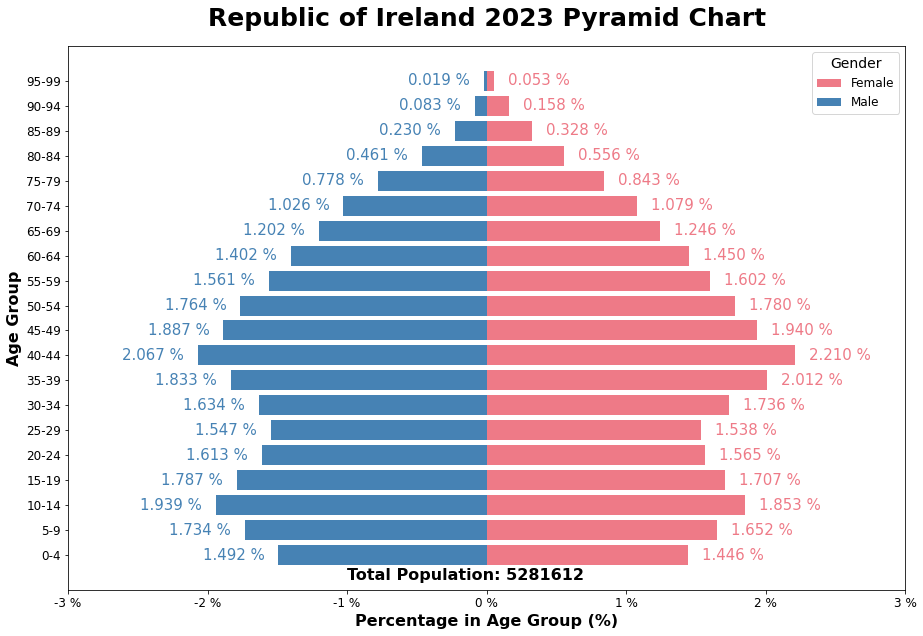

In [502]:
#code source from https://coderzcolumn.com/tutorials/data-science/population-pyramid-chart-using-matplotlib
female_color = "#ee7a87"
male_color = "#4682b4"

fig = plt.figure(figsize=(15,10))

plt.barh(y=piramid_df_2023["Age_Group"], width=piramid_df_2023["Female_Width"], color="#ee7a87", label="Female");
plt.barh(y=piramid_df_2023["Age_Group"], width=piramid_df_2023["Male_Width"], left=piramid_df_2023["Male_Left"],
         color="#4682b4", label="Male");



for idx in range(len(piramid_df_2023)):
    plt.text(x=piramid_df_2023["Male_Left"][idx]-0.1, y=idx, s="{:.3f} %".format(piramid_df_2023["Male"][idx]),
             ha="right", va="center",
             fontsize=15, color="#4682b4");
    plt.text(x=piramid_df_2023["Female_Width"][idx]+0.1, y=idx, s="{:.3f} %".format(piramid_df_2023["Female"][idx]),
             ha="left", va="center",
             fontsize=15, color="#ee7a87");

piramid_df_2023['total_population'] = (piramid_df_2023['Female'] + piramid_df_2023['Male'])*100000
total_population =int(piramid_df_2023['total_population'].sum()) #Adding and converting to int to eliminate .0
plt.xlim(-3,3);

plt.xticks(range(-3,4), ["{} %".format(i) for i in range(-3,4)], fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc="best",fontsize=12,title='Gender',title_fontsize=14); 
plt.xlabel("Percentage in Age Group (%)", fontsize=16, fontweight="bold")
plt.ylabel("Age Group", fontsize=16, fontweight="bold")
plt.title("Republic of Ireland 2023 Pyramid Chart", loc="center", pad=20, fontsize=25, fontweight="bold")

plt.text(-1, -1, f'Total Population: {total_population}', fontsize=16,fontweight="bold");

# Population density maps

In [397]:
# Loading the dataset:
#df2 = pd.read_csv('../Datasets_data.cso.ie\\PEA07.20231004T131011.csv')
df2=pd.read_csv('https://ws.cso.ie/public/api.restful/PxStat.Data.Cube_API.ReadDataset/PEA07/CSV/1.0/en')

In [398]:
# Displaying first 5 rows:
df2.head()

,STATISTIC,Statistic Label,C02076V02508,Age Group,C02199V02655,Sex,C02196V02652,Regional Authority Area,TLIST(A1),Year,UNIT,VALUE
0,PEA07,Estimated Population (Persons in April),205,0 - 4 years,-,Both sexes,-,State,1996,1996,Thousand,250.4
1,PEA07,Estimated Population (Persons in April),205,0 - 4 years,-,Both sexes,-,State,1997,1997,Thousand,250.0
2,PEA07,Estimated Population (Persons in April),205,0 - 4 years,-,Both sexes,-,State,1998,1998,Thousand,253.7
3,PEA07,Estimated Population (Persons in April),205,0 - 4 years,-,Both sexes,-,State,1999,1999,Thousand,259.8
4,PEA07,Estimated Population (Persons in April),205,0 - 4 years,-,Both sexes,-,State,2000,2000,Thousand,266.2


In [399]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11286 entries, 0 to 11285
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   STATISTIC                11286 non-null  object 
 1   Statistic Label          11286 non-null  object 
 2   C02076V02508             11286 non-null  object 
 3   Age Group                11286 non-null  object 
 4   C02199V02655             11286 non-null  object 
 5   Sex                      11286 non-null  object 
 6   C02196V02652             11286 non-null  object 
 7   Regional Authority Area  11286 non-null  object 
 8   TLIST(A1)                11286 non-null  int64  
 9   Year                     11286 non-null  int64  
 10  UNIT                     11286 non-null  object 
 11  VALUE                    11286 non-null  float64
dtypes: float64(1), int64(2), object(9)
memory usage: 1.0+ MB


In [400]:
# Dropping the 'STATISTIC Label' column it's irrelevant for the analysis
df2_col_drop = ['STATISTIC','Statistic Label','C02076V02508','C02199V02655','C02196V02652','TLIST(A1)','UNIT']
df2.drop(df2_col_drop ,axis=1, inplace=True) 

In [401]:
df2['VALUE'] = df2['VALUE'].apply(lambda x: x * 1000)

In [402]:
df2

,Age Group,Sex,Regional Authority Area,Year,VALUE
0,0 - 4 years,Both sexes,State,1996,250400.0
1,0 - 4 years,Both sexes,State,1997,250000.0
2,0 - 4 years,Both sexes,State,1998,253700.0
3,0 - 4 years,Both sexes,State,1999,259800.0
4,0 - 4 years,Both sexes,State,2000,266200.0
...,...,...,...,...,...
11281,All ages,Female,South-West,2013,338700.0
11282,All ages,Female,South-West,2014,341600.0
11283,All ages,Female,South-West,2015,343300.0
11284,All ages,Female,South-West,2016,345300.0


In [403]:
# Renaming the columns
df2 = df2.rename(columns={'Age Group': 'Age_Group','Regional Authority Area':'Area','VALUE':'Population'})

In [404]:
# Both sexes and State
df2a = df2[(df2['Sex'] == 'Both sexes') & (df2['Area'] == 'State')]
df2b = df2a.groupby('Year')['Population'].sum().reset_index() # Creating a df
df2b

,Year,Population
0,1996,7252000.0
1,1997,7328300.0
2,1998,7406000.0
3,1999,7483200.0
4,2000,7579200.0
5,2001,7694200.0
6,2002,7834400.0
7,2003,7960000.0
8,2004,8090400.0
9,2005,8267600.0


In [405]:
# !=Both sexes and != State
df2c = df2[(df2['Sex'] != 'Both sexes') & (df2['Area'] != 'State')]
df2d = df2c.groupby('Year')['Population'].sum().reset_index() # Creating a df
df2d

,Year,Population
0,1996,7252700.0
1,1997,7329000.0
2,1998,7406900.0
3,1999,7484500.0
4,2000,7579300.0
5,2001,7695100.0
6,2002,7834700.0
7,2003,7960300.0
8,2004,8090300.0
9,2005,8266500.0


In [406]:
df2d  = df2d .rename(columns={'Population': 'Population_2'}) # Renaming column Population to merge

In [407]:
df2b= pd.merge(df2b,df2d, on='Year') # Merging both df's

In [408]:
df2b['Pop_Diff'] = df2b['Population']-df2b['Population_2'] # Substracting Population to see if there are any differences

In [409]:
df2b

,Year,Population,Population_2,Pop_Diff
0,1996,7252000.0,7252700.0,-700.0
1,1997,7328300.0,7329000.0,-700.0
2,1998,7406000.0,7406900.0,-900.0
3,1999,7483200.0,7484500.0,-1300.0
4,2000,7579200.0,7579300.0,-100.0
5,2001,7694200.0,7695100.0,-900.0
6,2002,7834400.0,7834700.0,-300.0
7,2003,7960000.0,7960300.0,-300.0
8,2004,8090400.0,8090300.0,100.0
9,2005,8267600.0,8266500.0,1100.0


There are differences, not big but numbers not matching as they should be.


In [410]:
df2

,Age_Group,Sex,Area,Year,Population
0,0 - 4 years,Both sexes,State,1996,250400.0
1,0 - 4 years,Both sexes,State,1997,250000.0
2,0 - 4 years,Both sexes,State,1998,253700.0
3,0 - 4 years,Both sexes,State,1999,259800.0
4,0 - 4 years,Both sexes,State,2000,266200.0
...,...,...,...,...,...
11281,All ages,Female,South-West,2013,338700.0
11282,All ages,Female,South-West,2014,341600.0
11283,All ages,Female,South-West,2015,343300.0
11284,All ages,Female,South-West,2016,345300.0


In [411]:
# Dropping rows based on criteria
df2 = df2[~((df2['Sex'] == 'Both sexes') | (df2['Area'] == 'State') | (df2['Age_Group'] != 'All ages'))]



In [412]:
df2.reset_index(drop=True,inplace=True)
# Display the modified DataFrame
df2

,Age_Group,Sex,Area,Year,Population
0,All ages,Male,Border,1996,177600.0
1,All ages,Male,Border,1997,205400.0
2,All ages,Male,Border,1998,206700.0
3,All ages,Male,Border,1999,208600.0
4,All ages,Male,Border,2000,211300.0
...,...,...,...,...,...
347,All ages,Female,South-West,2013,338700.0
348,All ages,Female,South-West,2014,341600.0
349,All ages,Female,South-West,2015,343300.0
350,All ages,Female,South-West,2016,345300.0


In [413]:
# Finding the sum of 'VALUE' per 'Area', 'Year', and 'Sex'
df2_Sum_Area_Year = df2.groupby(['Year','Area'])['Population'].sum().reset_index()

# Converting the series to a DataFrame
df2_Sum_Area_Year = pd.DataFrame(df2_Sum_Area_Year)

df2_Sum_Area_Year

,Year,Area,Population
0,1996,Border,352400.0
1,1996,Dublin,407300.0
2,1996,Mid-East,1058300.0
3,1996,Mid-West,205500.0
4,1996,Midland,347400.0
...,...,...,...
171,2017,Mid-West,387400.0
172,2017,Midland,297100.0
173,2017,South-East,515300.0
174,2017,South-West,691400.0


Change Midland to Midland to match with .shp file

In [414]:

df2_Sum_Area_Year['Area'] = df2_Sum_Area_Year['Area'].str.replace('Midland', 'Midlands')


In [415]:
# Filtering Year 1996
map1996 = df2_Sum_Area_Year[df2_Sum_Area_Year['Year'] == 1996]


In [257]:
# Filtering Year 2017
map2017 = df2_Sum_Area_Year[df2_Sum_Area_Year['Year'] == 2017]


## Important information for the population maps:

1. I've downloaded the .shp files from here: https://dataosi.opendata.arcgis.com/datasets/965d309475cd44a7885e883a7479bd00/explore

2. I've looked up this website to see how to plot using .shp files:
https://github.com/beepscore/census_play/blob/master/us_states.ipynb

Population density map for 1996

In [416]:
map1996

,Year,Area,Population
0,1996,Border,352400.0
1,1996,Dublin,407300.0
2,1996,Mid-East,1058300.0
3,1996,Mid-West,205500.0
4,1996,Midlands,347400.0
5,1996,South-East,317000.0
6,1996,South-West,391500.0
7,1996,West,546700.0


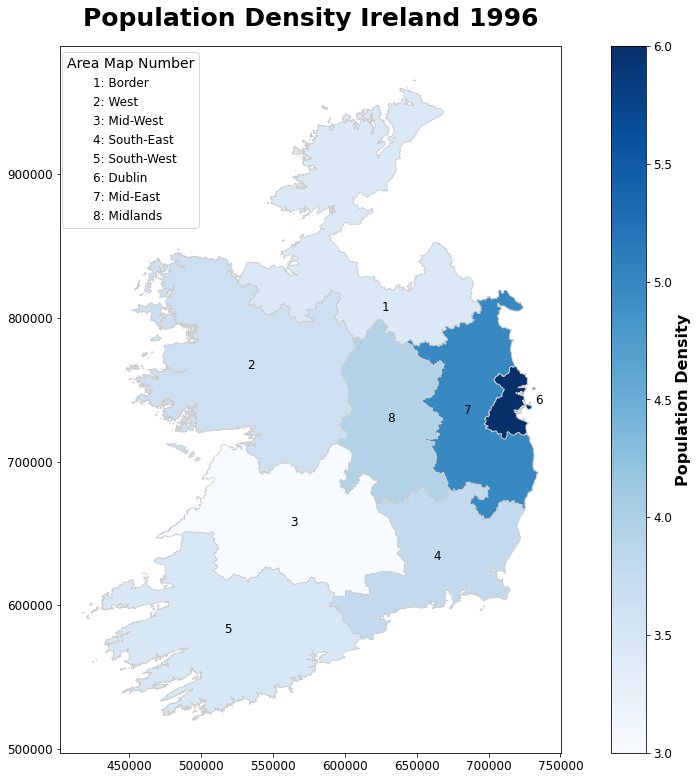

In [478]:
# Source code: https://github.com/beepscore/census_play/blob/master/us_states.ipynb

# Plotting Year 1996
shapefile_path = "..\\Ireland_map\\NUTS3_Boundaries_Gen_50m___2015.shp"
gdf = gpd.read_file(shapefile_path)

# Merging shapefile with map1996
mrg1996 = gdf.set_index('NUTS3NAME').join(map1996.set_index('Area'))

# Converting square meters to square kilometers
mrg1996['SHAPE_Area'] = mrg1996['SHAPE_Area'] / 1000000

# Calculating population density
mrg1996['Pop_Density'] = mrg1996['Population'] / mrg1996['SHAPE_Area']

# Normalizing Population density otherwise, map is blank with Dublin very blue...
mrg1996['Pop_Density_scaled'] = mrg1996['Pop_Density'].apply(lambda x: 1 if x == 0 else np.log(x))

# Plotting the  map
fig, ax = plt.subplots(figsize=(18,13))
mrg1996.plot(column='Pop_Density_scaled', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

# Assigning a legend number to each of the areas
map_numbers = mrg1996.index.tolist()
legend_patches = [mpatches.Patch(label=f"{i + 1}: {map_numbers[i]}") for i in range(len(map_numbers))]
legend_title = 'Area Map Number'
legend.get_title().set_fontsize(14)  
legend = ax.legend(handles=legend_patches, title=legend_title, loc='upper right', bbox_to_anchor=(0.289, 1),
                   handlelength=0, fontsize=12, title_fontsize=14)

# Iterating to assign numbers into the map
for idx, row in mrg1996.iterrows():
    centroid = row['geometry'].centroid
    if idx == 'Dublin':         #Adjusting number 6 Dublin, due to color legend is not visible on default position
        ax.annotate(text=str(map_numbers.index(idx) + 1), xy=(centroid.x, centroid.y), color='black', fontsize=12,
                    ha='center', va='center', xytext=(30, 5), textcoords="offset points")
    elif idx == 'Border':       #Adjusting number 1 Border, by default falls under Nothern Ireland....
        ax.annotate(text=str(map_numbers.index(idx) + 1), xy=(centroid.x, centroid.y), color='black', fontsize=12,
                    ha='center', va='center', xytext=(25, -70), textcoords="offset points")
    elif idx == 'Mid-East':     #Adjusting number 7 Mid-East, very clos to Dublin, I want to avoid confusion.
        ax.annotate(text=str(map_numbers.index(idx) + 1), xy=(centroid.x, centroid.y), color='black', fontsize=12,
                    ha='center', va='center', xytext=(-10, 0), textcoords="offset points")
    else:
        ax.annotate(text=str(map_numbers.index(idx) + 1), xy=(centroid.x, centroid.y), color='black', fontsize=12,
                    ha='center', va='center')
# Color and Title

plt.title('Population Density Ireland 1996', loc="center", pad=20, fontsize=25, fontweight="bold");
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=3, vmax=6))
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Population Density',fontsize=16, fontweight="bold")
cbar.ax.tick_params(labelsize=12) 
ax.tick_params(axis='both', which='major', labelsize=12)
plt.show()

In [418]:
mrg1996

,OBJECTID_1,NUTS1,NUTS1NAME,NUTS2,NUTS2NAME,NUTS3,GUID,SHAPE_Leng,SHAPE_Area,geometry,Year,Population,Pop_Density,Pop_Density_scaled
NUTS3NAME,,,,,,,,,,,,,,
Border,1,IE,Ireland,IE04,Northern and Western,IE041,B1A65D7C-1984-4A87-AD58-0E846812C992,2.376811e+06,11510.209483,"MULTIPOLYGON (((647223.812 966808.938, 647226....",1996,352400.0,30.616298,3.421532
West,2,IE,Ireland,IE04,Northern and Western,IE042,A69CA800-8D87-4920-A7C1-50426A1D39B4,2.851487e+06,14280.718711,"MULTIPOLYGON (((497858.799 703047.251, 498064....",1996,546700.0,38.282387,3.644990
Mid-West,3,IE,Ireland,IE05,Southern,IE051,42C5C2A5-2D71-4BD1-BDB5-BD7D3198CD78,8.647434e+05,10507.423875,"MULTIPOLYGON (((468764.092 647302.732, 468611....",1996,205500.0,19.557601,2.973364
South-East,4,IE,Ireland,IE05,Southern,IE052,27C93D4E-AD0E-4B0C-8FA8-3566AEEDA5CC,9.134367e+05,7195.649606,"MULTIPOLYGON (((616432.584 577036.626, 616395....",1996,317000.0,44.054396,3.785425
South-West,5,IE,Ireland,IE05,Southern,IE053,604546A1-A856-4B9B-AD46-E88B27C27155,2.372816e+06,12303.973347,"MULTIPOLYGON (((497699.643 523320.222, 497892....",1996,391500.0,31.818990,3.460063
Dublin,6,IE,Ireland,IE06,Eastern and Midland,IE061,F97E459B-57ED-49C0-8A28-2BC1C7F08E88,3.306883e+05,926.170974,"MULTIPOLYGON (((727936.153 726402.351, 727861....",1996,407300.0,439.767615,6.086246
Mid-East,7,IE,Ireland,IE06,Eastern and Midland,IE062,8E4862CC-7E43-4BF5-A4EF-B2D5ECBA61EF,8.463175e+05,6888.621453,"POLYGON ((708084.443 819557.969, 708154.474 81...",1996,1058300.0,153.630158,5.034548
Midlands,8,IE,Ireland,IE06,Eastern and Midland,IE063,B26C8BAA-F3C5-49A9-B74E-D7FED1823E65,6.234747e+05,6648.679868,"POLYGON ((623194.082 799193.724, 623350.489 79...",1996,347400.0,52.250974,3.956059


In [419]:
# Showing relevant values for 1996:
mrg1996.reset_index(inplace=True)
mrg_1996 = mrg1996[['Year', 'NUTS3NAME', 'SHAPE_Area', 'Population', 'Pop_Density','Pop_Density_scaled']].copy()
mrg_1996.rename(columns={'SHAPE_Area': 'SHAPE_Area_Km2'}, inplace=True)
mrg_1996

,Year,NUTS3NAME,SHAPE_Area_Km2,Population,Pop_Density,Pop_Density_scaled
0,1996,Border,11510.209483,352400.0,30.616298,3.421532
1,1996,West,14280.718711,546700.0,38.282387,3.644990
2,1996,Mid-West,10507.423875,205500.0,19.557601,2.973364
3,1996,South-East,7195.649606,317000.0,44.054396,3.785425
4,1996,South-West,12303.973347,391500.0,31.818990,3.460063
5,1996,Dublin,926.170974,407300.0,439.767615,6.086246
6,1996,Mid-East,6888.621453,1058300.0,153.630158,5.034548
7,1996,Midlands,6648.679868,347400.0,52.250974,3.956059


Population density map for 2017

In [420]:
map2017

,Year,Area,Population
168,2017,Border,528100.0
169,2017,Dublin,1350000.0
170,2017,Mid-East,571100.0
171,2017,Mid-West,387400.0
172,2017,Midlands,297100.0
173,2017,South-East,515300.0
174,2017,South-West,691400.0
175,2017,West,452200.0


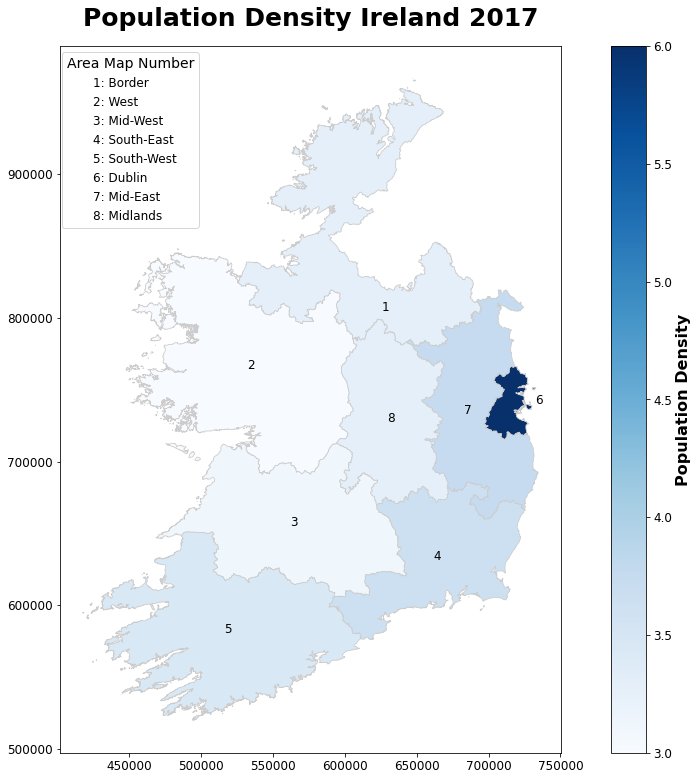

In [477]:
# Source code: https://github.com/beepscore/census_play/blob/master/us_states.ipynb

# Plotting Year 2017
shapefile_path = "..\\Ireland_map\\NUTS3_Boundaries_Gen_50m___2015.shp"
gdf = gpd.read_file(shapefile_path)

# Merging shapefile with map2017
mrg2017 = gdf.set_index('NUTS3NAME').join(map2017.set_index('Area'))

# Converting square meters to square kilometers
mrg2017['SHAPE_Area'] = mrg2017['SHAPE_Area'] / 1000000

# Calculating population density
mrg2017['Pop_Density'] = mrg2017['Population'] / mrg2017['SHAPE_Area']

# Normalizing Population density otherwise, map is blank with Dublin very blue...
mrg2017['Pop_Density_scaled'] = mrg2017['Pop_Density'].apply(lambda x: 1 if x == 0 else np.log(x))

# Plotting the  map
fig, ax = plt.subplots(figsize=(18,13))
mrg2017.plot(column='Pop_Density_scaled', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

# Assigning a legend number to each of the areas
map_numbers = mrg2017.index.tolist()
legend_patches = [mpatches.Patch(label=f"{i + 1}: {map_numbers[i]}") for i in range(len(map_numbers))]
legend_title = 'Area Map Number'
legend.get_title().set_fontsize(14)  
legend = ax.legend(handles=legend_patches, title=legend_title, loc='upper right', bbox_to_anchor=(0.289, 1),
                   handlelength=0, fontsize=12, title_fontsize=14)

# Iterating to assign numbers into the map
for idx, row in mrg2017.iterrows():
    centroid = row['geometry'].centroid
    if idx == 'Dublin':         #Adjusting number 6 Dublin, due to color legend is not visible on default position
        ax.annotate(text=str(map_numbers.index(idx) + 1), xy=(centroid.x, centroid.y), color='black', fontsize=12,
                    ha='center', va='center', xytext=(30, 5), textcoords="offset points")
    elif idx == 'Border':       #Adjusting number 1 Border, by default falls under Nothern Ireland....
        ax.annotate(text=str(map_numbers.index(idx) + 1), xy=(centroid.x, centroid.y), color='black', fontsize=12,
                    ha='center', va='center', xytext=(25, -70), textcoords="offset points")
    elif idx == 'Mid-East':     #Adjusting number 7 Mid-East, very clos to Dublin, I want to avoid confusion.
        ax.annotate(text=str(map_numbers.index(idx) + 1), xy=(centroid.x, centroid.y), color='black', fontsize=12,
                    ha='center', va='center', xytext=(-10, 0), textcoords="offset points")
    else:
        ax.annotate(text=str(map_numbers.index(idx) + 1), xy=(centroid.x, centroid.y), color='black', fontsize=12,
                    ha='center', va='center')
# Color and Title

plt.title('Population Density Ireland 2017', loc="center", pad=20, fontsize=25, fontweight="bold");
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=3, vmax=6))
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Population Density',fontsize=16, fontweight="bold")
cbar.ax.tick_params(labelsize=12) 
ax.tick_params(axis='both', which='major', labelsize=12)
plt.show()

In [422]:
# Showing relevant values for 2017:
mrg2017.reset_index(inplace=True)
mrg_2017 = mrg2017[['Year', 'NUTS3NAME', 'SHAPE_Area', 'Population', 'Pop_Density','Pop_Density_scaled']].copy()
mrg_2017.rename(columns={'SHAPE_Area': 'SHAPE_Area_Km2'}, inplace=True)
mrg_2017

,Year,NUTS3NAME,SHAPE_Area_Km2,Population,Pop_Density,Pop_Density_scaled
0,2017,Border,11510.209483,528100.0,45.881007,3.826051
1,2017,West,14280.718711,452200.0,31.665073,3.455214
2,2017,Mid-West,10507.423875,387400.0,36.869170,3.607376
3,2017,South-East,7195.649606,515300.0,71.612714,4.271273
4,2017,South-West,12303.973347,691400.0,56.193230,4.028796
5,2017,Dublin,926.170974,1350000.0,1457.614240,7.284556
6,2017,Mid-East,6888.621453,571100.0,82.904831,4.417693
7,2017,Midlands,6648.679868,297100.0,44.685563,3.799650


Loading csv PEA04.20231004T131011.csv, we need to get 2023 to see how the map looks like.

In [423]:
# Loading the dataset:
df3 = pd.read_csv('..\\Datasets_data.cso.ie\\PEA04.20231004T131011.csv')

In [424]:
df3.head()

,STATISTIC Label,Year,Age Group,Sex,Region,UNIT,VALUE
0,Estimated Population (Persons in April),2011,0 - 4 years,Both sexes,State,Thousand,356.0
1,Estimated Population (Persons in April),2011,0 - 4 years,Both sexes,Border,Thousand,30.7
2,Estimated Population (Persons in April),2011,0 - 4 years,Both sexes,West,Thousand,32.6
3,Estimated Population (Persons in April),2011,0 - 4 years,Both sexes,Mid-West,Thousand,35.0
4,Estimated Population (Persons in April),2011,0 - 4 years,Both sexes,South-East,Thousand,32.0


In [425]:

# Dropping the 'STATISTIC Label' column it's irrelevant for the analysis
df3_col_drop = ['STATISTIC Label','UNIT']
df3.drop(df3_col_drop ,axis=1, inplace=True) 

In [426]:
df3['VALUE'] = df3['VALUE'].apply(lambda x: x * 1000)

In [427]:
# Renaming columns
df3 = df3.rename(columns={'Age Group': 'Age_Group','Region':'Area','VALUE':'Population'})

In [428]:
df3.head()

,Year,Age_Group,Sex,Area,Population
0,2011,0 - 4 years,Both sexes,State,356000.0
1,2011,0 - 4 years,Both sexes,Border,30700.0
2,2011,0 - 4 years,Both sexes,West,32600.0
3,2011,0 - 4 years,Both sexes,Mid-West,35000.0
4,2011,0 - 4 years,Both sexes,South-East,32000.0


In [429]:
df3 = df3[~((df3['Year'] != 2023) |(df3['Sex'] == 'Both sexes') | (df3['Area'] == 'State') | (df3['Age_Group'] == 'All ages'))]

Change Midland to Midland to match with .shp file

In [430]:
df3['Area'] = df3['Area'].str.replace('Midland', 'Midlands')

In [431]:
map2023 = df3.groupby(['Year','Area'])['Population'].sum().reset_index()

In [432]:
map2023

,Year,Area,Population
0,2023,Border,432000.0
1,2023,Dublin,1501300.0
2,2023,Mid-East,777200.0
3,2023,Mid-West,519500.0
4,2023,Midlands,324700.0
5,2023,South-East,468600.0
6,2023,South-West,757200.0
7,2023,West,501000.0


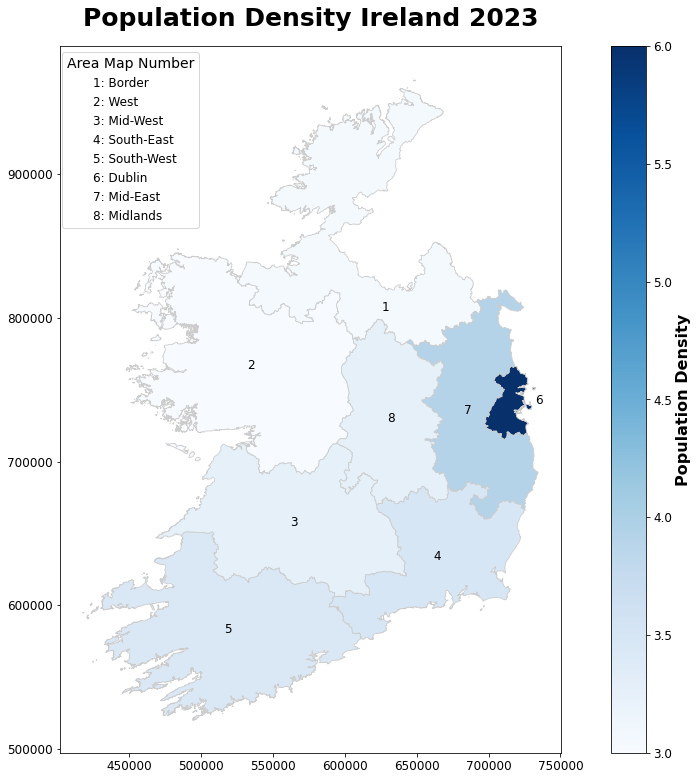

In [476]:
# Source code: https://github.com/beepscore/census_play/blob/master/us_states.ipynb

# Plotting Year 2023
shapefile_path = "..\\Ireland_map\\NUTS3_Boundaries_Gen_50m___2015.shp"
gdf = gpd.read_file(shapefile_path)

# Merging shapefile with map2023
mrg2023 = gdf.set_index('NUTS3NAME').join(map2023.set_index('Area'))

# Converting square meters to square kilometers
mrg2023['SHAPE_Area'] = mrg2023['SHAPE_Area'] / 1000000

# Calculating population density
mrg2023['Pop_Density'] = mrg2023['Population'] / mrg2023['SHAPE_Area']

# Normalizing Population density otherwise, map is blank with Dublin very blue...
mrg2023['Pop_Density_scaled'] = mrg2023['Pop_Density'].apply(lambda x: 1 if x == 0 else np.log(x))

# Plotting the  map
fig, ax = plt.subplots(figsize=(18,13))
mrg2023.plot(column='Pop_Density_scaled', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

# Assigning a legend number to each of the areas
map_numbers = mrg2023.index.tolist()
legend_patches = [mpatches.Patch(label=f"{i + 1}: {map_numbers[i]}") for i in range(len(map_numbers))]
legend_title = 'Area Map Number'
legend.get_title().set_fontsize(14)  
legend = ax.legend(handles=legend_patches, title=legend_title, loc='upper right', bbox_to_anchor=(0.289, 1),
                   handlelength=0, fontsize=12, title_fontsize=14)

# Iterating to assign numbers into the map
for idx, row in mrg2023.iterrows():
    centroid = row['geometry'].centroid
    if idx == 'Dublin':         #Adjusting number 6 Dublin, due to color legend is not visible on default position
        ax.annotate(text=str(map_numbers.index(idx) + 1), xy=(centroid.x, centroid.y), color='black', fontsize=12,
                    ha='center', va='center', xytext=(30, 5), textcoords="offset points")
    elif idx == 'Border':       #Adjusting number 1 Border, by default falls under Nothern Ireland....
        ax.annotate(text=str(map_numbers.index(idx) + 1), xy=(centroid.x, centroid.y), color='black', fontsize=12,
                    ha='center', va='center', xytext=(25, -70), textcoords="offset points")
    elif idx == 'Mid-East':     #Adjusting number 7 Mid-East, very clos to Dublin, I want to avoid confusion.
        ax.annotate(text=str(map_numbers.index(idx) + 1), xy=(centroid.x, centroid.y), color='black', fontsize=12,
                    ha='center', va='center', xytext=(-10, 0), textcoords="offset points")
    else:
        ax.annotate(text=str(map_numbers.index(idx) + 1), xy=(centroid.x, centroid.y), color='black', fontsize=12,
                    ha='center', va='center')
# Color and Title

plt.title('Population Density Ireland 2023', loc="center", pad=20, fontsize=25, fontweight="bold");
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=3, vmax=6))
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Population Density',fontsize=16, fontweight="bold")
cbar.ax.tick_params(labelsize=12) 
ax.tick_params(axis='both', which='major', labelsize=12)
plt.show()

In [434]:
# Showing relevant values for 2023:
mrg2023.reset_index(inplace=True)
mrg_2023 = mrg2023[['Year', 'NUTS3NAME', 'SHAPE_Area', 'Population', 'Pop_Density','Pop_Density_scaled']].copy()
mrg_2023.rename(columns={'SHAPE_Area': 'SHAPE_Area_Km2'}, inplace=True)
mrg_2023

,Year,NUTS3NAME,SHAPE_Area_Km2,Population,Pop_Density,Pop_Density_scaled
0,2023,Border,11510.209483,432000.0,37.531897,3.625191
1,2023,West,14280.718711,501000.0,35.082268,3.557696
2,2023,Mid-West,10507.423875,519500.0,49.441234,3.900785
3,2023,South-East,7195.649606,468600.0,65.122682,4.176273
4,2023,South-West,12303.973347,757200.0,61.541096,4.119705
5,2023,Dublin,926.170974,1501300.0,1620.975006,7.390783
6,2023,Mid-East,6888.621453,777200.0,112.823735,4.725827
7,2023,Midlands,6648.679868,324700.0,48.836763,3.888483


In [480]:
# Summarising/merging all relevant info for the maps
map_summary = pd.concat([mrg_1996,mrg_2023], ignore_index=True) 
map_summary = map_summary.rename(columns={'NUTS3NAME': 'Area'}) # Renaming NUTS3NAME to area
map_summary

,Year,Area,SHAPE_Area_Km2,Population,Pop_Density,Pop_Density_scaled
0,1996,Border,11510.209483,352400.0,30.616298,3.421532
1,1996,West,14280.718711,546700.0,38.282387,3.644990
2,1996,Mid-West,10507.423875,205500.0,19.557601,2.973364
3,1996,South-East,7195.649606,317000.0,44.054396,3.785425
4,1996,South-West,12303.973347,391500.0,31.818990,3.460063
5,1996,Dublin,926.170974,407300.0,439.767615,6.086246
6,1996,Mid-East,6888.621453,1058300.0,153.630158,5.034548
7,1996,Midlands,6648.679868,347400.0,52.250974,3.956059
8,2023,Border,11510.209483,432000.0,37.531897,3.625191
9,2023,West,14280.718711,501000.0,35.082268,3.557696


In [481]:
mapsummary = map_summary.pivot_table(index=['Year'],columns='Area', values=['Pop_Density'], aggfunc='sum').reset_index()

In [482]:
mapsummary

Year Pop_Density                                                 \
Area            Border       Dublin    Mid-East   Mid-West   Midlands   
0     1996   30.616298   439.767615  153.630158  19.557601  52.250974   
1     2023   37.531897  1620.975006  112.823735  49.441234  48.836763   

                                       
Area South-East South-West       West  
0     44.054396  31.818990  38.282387  
1     65.122682  61.541096  35.082268

# Area breakdown:

1. **Border**: Cavan, Donegal, Leitrim, Monaghan, Sligo.

2. **Midland**: Laois, Longford, Offaly, Westmeath.

3. **West**: Galway, Mayo, Roscommon.

4. **Dublin**: Dublin City, Dún Laoghaire-Rathdown, Fingal, South Dublin.

5. **Mid-East**: Kildare, Louth, Meath, Wicklow.

6. **Mid-West**: Clare, Limerick, Tipperary.

7. **South-East**: Carlow, Kilkenny, Waterford, Wexford.

8. **South-West**: Cork, Kerry.

Source: https://www.cso.ie/en/methods/informationnotefordatausersrevisiontotheirishnuts2andnuts3regions/
